In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# data load, preprocessing
data = pd.read_csv('./dataset.txt', sep = ",")
texts = data['text_column']
labels = data['label_column']


ParserError: Error tokenizing data. C error: Expected 2 fields in line 1747, saw 4


In [16]:
print("amount of datas : " + str(texts.count()))

amount_of_food = 0
amount_of_it = 0
amount_of_school = 0
amount_of_sports = 0

for i in labels:
    if i == 0:
        amount_of_food += 1
    elif i == 1:
        amount_of_it += 1
    elif i == 2:
        amount_of_school += 1
    elif i == 3:
        amount_of_sports += 1

print("food_data : " + str(amount_of_food) + "\nit_data : " + str(amount_of_it) + "\nschool_data : " + str(amount_of_school) + "\nsports_data : " + str(amount_of_sports))

amount of datas : 4130
food_data : 1735
it_data : 1750
school_data : 470
sports_data : 175


In [13]:
from konlpy.tag import Okt

morpheme_sep = []

twt = Okt()
tagging = twt.pos(texts[2500])
print(str(tagging) + "\n")

for i, j in tagging:
    morpheme_sep.append(i)

stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한'])
clean_data = [token for token in morpheme_sep if not token in stop_words]

print("not apply stop_words : " + str(morpheme_sep))
print("apply stop_words : " + str(clean_data))



[('인공', 'Noun'), ('지능', 'Noun'), ('은', 'Josa'), ('로봇', 'Noun'), ('의', 'Josa'), ('학습', 'Noun'), ('을', 'Josa'), ('개선', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation')]

not apply stop_words : ['인공', '지능', '은', '로봇', '의', '학습', '을', '개선', '합니다', '.']
apply stop_words : ['인공', '지능', '로봇', '학습', '을', '개선', '합니다', '.']


In [13]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=80)

In [14]:
# multiclass label prepare
from keras.utils import to_categorical
y = to_categorical(labels, num_classes=4)  # amount of class

Epoch 1/3
42/42 [==============================] - 5s 57ms/step - loss: 1.0804 - accuracy: 0.7374 - val_loss: 0.7834 - val_accuracy: 0.7579
Epoch 2/3
42/42 [==============================] - 2s 43ms/step - loss: 0.4253 - accuracy: 0.8804 - val_loss: 0.2487 - val_accuracy: 0.9274
Epoch 3/3
42/42 [==============================] - 2s 44ms/step - loss: 0.1524 - accuracy: 0.9572 - val_loss: 0.1584 - val_accuracy: 0.9486
{'loss': [1.080392837524414, 0.42525047063827515, 0.15243414044380188], 'accuracy': [0.737419605255127, 0.8804389238357544, 0.9572455286979675], 'val_loss': [0.7834339737892151, 0.24870532751083374, 0.15838715434074402], 'val_accuracy': [0.7579424977302551, 0.92738276720047, 0.9485628008842468]}


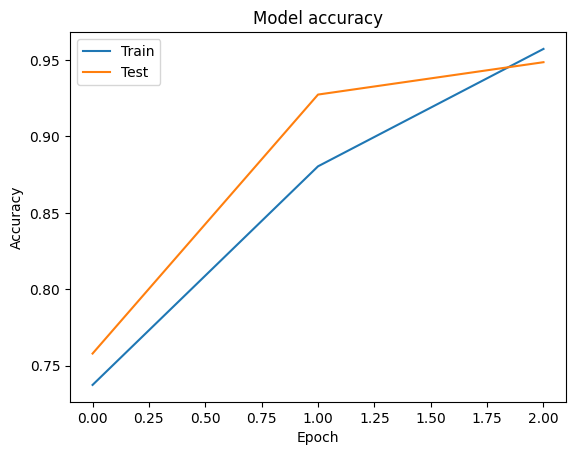

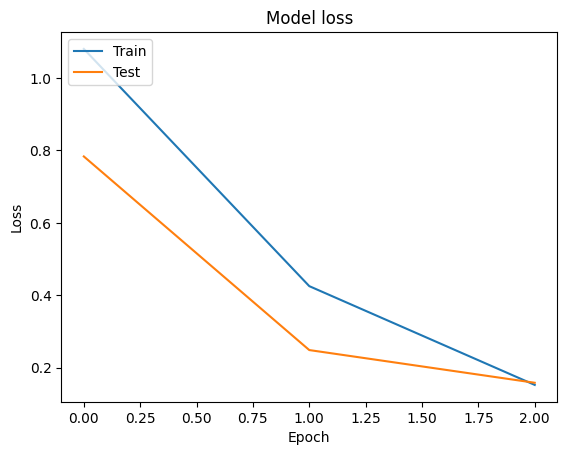

26/26 [==============================] - 0s 12ms/step - loss: 0.1261 - accuracy: 0.9697
Loss: 0.12610559165477753, Accuracy: 0.9697336554527283
학습된 모델이 저장되었습니다.


c:\Users\dargu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# data divising
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model structure
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=80))
model.add(LSTM(32))
model.add(Dense(4, activation='softmax'))  # print softmax of 4 class

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=1)
print(history.history)

# training visualizing (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#training visualizing (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# model save
model.save('./recog_situation_model.h5')
print("학습된 모델이 저장되었습니다.")